In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
filename = "/content/drive/MyDrive/Mis/StudentsPerformance.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
score_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.tail()


,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
score_df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

<ipython-input-16-d244754bd87e>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


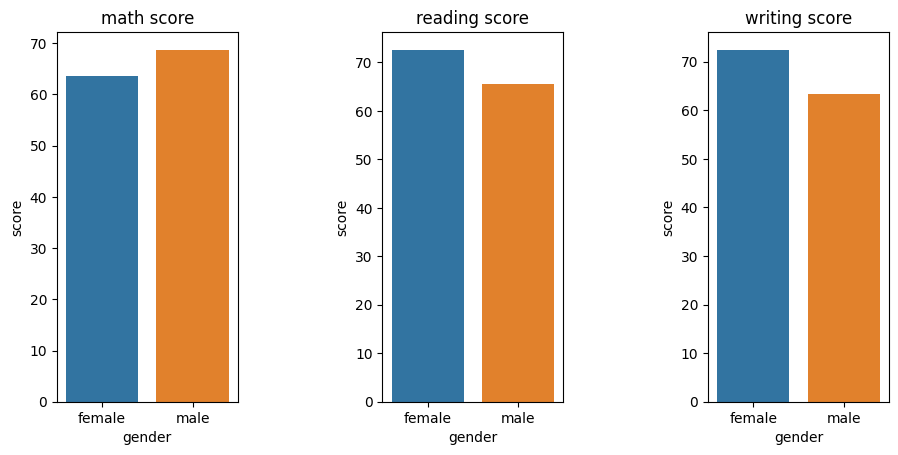

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = score_df.groupby("gender")[list(score_df.columns[-3:])[idx]].mean()
    sns.barplot(x=gender_df.index, y = gender_df.values)
    plt.ylabel("score")
    plt.title(list(score_df.columns[-3:])[idx])

plt.show()




In [ ]:
score_df

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
X1 = score_df.drop(columns=['math'],axis=1)
X2 = score_df.drop(columns=['reading'],axis=1)
X3 = score_df.drop(columns=['writing'],axis=1)

In [ ]:
X3.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [ ]:
y1 = score_df['math']
y2 = score_df['reading']
y3 = score_df['writing']

In [ ]:
y1.head()
y2.head()
y3.head()

0    74
1    88
2    93
3    44
4    75
Name: writing, dtype: int64

In [ ]:
print("Categories in 'gender' variable:     ",end=" " )
print(score_df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(score_df['ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(score_df['parent_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(score_df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(score_df['pre'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [ ]:
num_features = X1.select_dtypes(exclude="object").columns
cat_features = X1.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

X1 = preprocessor.fit_transform(X1)

In [ ]:
X1

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [ ]:
num_features = X2.select_dtypes(exclude="object").columns
cat_features = X2.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

X2 = preprocessor.fit_transform(X2)

In [ ]:
num_features = X3.select_dtypes(exclude="object").columns
cat_features = X3.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

X3 = preprocessor.fit_transform(X3)

In [ ]:
X1

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [ ]:
X1.shape

(1000, 19)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)
X1_train.shape, X1_test.shape

((800, 19), (200, 19))

In [ ]:
y1_train.shape, y1_test.shape

((800,), (200,))

สร้างชุดคำสั่งเพื่อคำนวณเปรียบเทียบ model ที่เหมาะสม


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
print("Model for math score")
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),

}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X1_train, y1_train) # Train model

    # Make predictions
    y1_train_pred = model.predict(X1_train)
    y1_test_pred = model.predict(X1_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y1_train, y1_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y1_test, y1_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Model for math score
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
--

In [ ]:
print("Model for math score")
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model for math score


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.851818
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.748745


In [ ]:
print("Model for reading score")
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),

}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X2_train, y2_train) # Train model

    # Make predictions
    y2_train_pred = model.predict(X2_train)
    y2_test_pred = model.predict(X2_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y2_train, y2_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y2_test, y2_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Model for reading score
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.8826
- Mean Absolute Error: 3.1303
- R2 Score: 0.9278
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.2870
- Mean Absolute Error: 3.4706
- R2 Score: 0.9188


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.2215
- Mean Absolute Error: 3.4220
- R2 Score: 0.9147
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6350
- Mean Absolute Error: 3.6941
- R2 Score: 0.9051


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.8720
- Mean Absolute Error: 3.1221
- R2 Score: 0.9282
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3028
- Mean Absolute Error: 3.4861
- R2 Score: 0.9182


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.8056
- Mean Absolute Error: 3.7478
- R2 Score: 0.8894

In [ ]:
print("Model for reading score")
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model for reading score


,Model Name,R2_Score
0,Linear Regression,0.918783
2,Ridge,0.918184
5,Random Forest Regressor,0.909937
1,Lasso,0.905059
3,K-Neighbors Regressor,0.837096
4,Decision Tree,0.833418


In [ ]:
print("Model for reading score score")
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),

}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X3_train, y3_train) # Train model

    # Make predictions
    y3_train_pred = model.predict(X3_train)
    y3_test_pred = model.predict(X3_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y3_train, y3_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y3_test, y3_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Model for reading score score
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3779
- Mean Absolute Error: 2.7165
- R2 Score: 0.9498
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8659
- Mean Absolute Error: 3.1903
- R2 Score: 0.9380


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.5135
- Mean Absolute Error: 3.6478
- R2 Score: 0.9104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9256
- Mean Absolute Error: 3.8964
- R2 Score: 0.8993


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.3740
- Mean Absolute Error: 2.7102
- R2 Score: 0.9499
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8612
- Mean Absolute Error: 3.2005
- R2 Score: 0.9381


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.1250
- Mean Absolute Error: 3.3235
- R2 Score: 

In [ ]:
print("Model for writing score")
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

Model for writing score


,Model Name,R2_Score
2,Ridge,0.938143
0,Linear Regression,0.937992
5,Random Forest Regressor,0.912898
1,Lasso,0.899336
3,K-Neighbors Regressor,0.881183
4,Decision Tree,0.865424


linear regression

In [ ]:
y_avg = (y1+y2+y3)/3


In [ ]:
y_avg


0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

Train test split data

In [ ]:
X_avg = score_df.drop(columns=['math','reading','writing'])

In [ ]:
X_avg

,gender,ethnicity,parent_education,lunch,pre
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [ ]:
num_features = X_avg.select_dtypes(exclude="object").columns
cat_features = X_avg.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        # ("StandardScaler", numeric_transformer, num_features),
    ]
)

X_avg = preprocessor.fit_transform(X_avg)

In [ ]:
pd.DataFrame(X_avg)

,0
0,"(0, 0)\t1.0\n (0, 3)\t1.0\n (0, 8)\t1.0\n ..."
1,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 11)\t1.0\n..."
2,"(0, 0)\t1.0\n (0, 3)\t1.0\n (0, 10)\t1.0\n..."
3,"(0, 1)\t1.0\n (0, 2)\t1.0\n (0, 7)\t1.0\n ..."
4,"(0, 1)\t1.0\n (0, 4)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 10)\t1.0\n..."
996,"(0, 1)\t1.0\n (0, 4)\t1.0\n (0, 9)\t1.0\n ..."
997,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 9)\t1.0\n ..."
998,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 11)\t1.0\n..."


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold

In [ ]:
X_avg_train, X_avg_test, y_avg_train, y_avg_test = train_test_split(X_avg, y_avg, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, r2_score, mean_absolute_percentage_error
from sklearn.metrics import f1_score

In [ ]:
results =[]

In [ ]:
model1 = RandomForestRegressor()
param_grid1 = {'n_estimators': [50, 100, 200],'max_depth': [10, 20]}
grid_search = GridSearchCV(model1, param_grid1, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_avg_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_avg_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)
f1 = f1_score(y_pred,y_avg_test)

results.append({
    'Model': model1,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square,
    'f1' : f1
})

ValueError: ignored

In [ ]:
results

[{'Model': RandomForestRegressor(),
  'Best Parameters': {'max_depth': 10, 'n_estimators': 200},
  'RMSE': 14.676892887685048,
  'MAPE': 0.22528195357729683,
  'r2': -1.8786601031813586}]

In [ ]:
model2 = KNeighborsRegressor()
param_grid2 = {'n_neighbors': [1,2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(model2, param_grid2, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_avg_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_avg_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)

results.append({
    'Model': model2,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
results

[{'Model': RandomForestRegressor(),
  'Best Parameters': {'max_depth': 10, 'n_estimators': 200},
  'RMSE': 14.676892887685048,
  'MAPE': 0.22528195357729683,
  'r2': -1.8786601031813586},
 {'Model': KNeighborsRegressor(),
  'Best Parameters': {'n_neighbors': 9},
  'RMSE': 14.62161618317059,
  'MAPE': 0.22965026378298212,
  'r2': -2.7030167900060604}]

In [ ]:
model3 = LinearRegression()
param_grid3 = {}
grid_search = GridSearchCV(model3, param_grid3, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_avg_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_avg_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)

results.append({
    'Model': model3,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
results

[{'Model': RandomForestRegressor(),
  'Best Parameters': {'max_depth': 10, 'n_estimators': 200},
  'RMSE': 14.676892887685048,
  'MAPE': 0.22528195357729683,
  'r2': -1.8786601031813586},
 {'Model': KNeighborsRegressor(),
  'Best Parameters': {'n_neighbors': 9},
  'RMSE': 14.62161618317059,
  'MAPE': 0.22965026378298212,
  'r2': -2.7030167900060604},
 {'Model': LinearRegression(),
  'Best Parameters': {},
  'RMSE': 13.40158056520849,
  'MAPE': 0.20993799558119655,
  'r2': -2.7030167900060604}]

In [ ]:
model4 = SVR()
param_grid4 = {'C': [0.1, 1, 10],'kernel': ['rbf', 'poly']}
grid_search = GridSearchCV(model4, param_grid4, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_avg_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_avg_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)

results.append({
    'Model': model4,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})


In [ ]:
results

[{'Model': RandomForestRegressor(),
  'Best Parameters': {'max_depth': 10, 'n_estimators': 200},
  'RMSE': 14.676892887685048,
  'MAPE': 0.22528195357729683,
  'r2': -1.8786601031813586},
 {'Model': KNeighborsRegressor(),
  'Best Parameters': {'n_neighbors': 9},
  'RMSE': 14.62161618317059,
  'MAPE': 0.22965026378298212,
  'r2': -2.7030167900060604},
 {'Model': LinearRegression(),
  'Best Parameters': {},
  'RMSE': 13.40158056520849,
  'MAPE': 0.20993799558119655,
  'r2': -2.7030167900060604},
 {'Model': SVR(),
  'Best Parameters': {'C': 1, 'kernel': 'poly'},
  'RMSE': 13.66320581180487,
  'MAPE': 0.21377124596851987,
  'r2': -2.7030167900060604}]

In [ ]:
model5 = DecisionTreeRegressor()
param_grid5 = {'max_depth': [10, 20, 30, 40, 50]}
grid_search = GridSearchCV(model5, param_grid5, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_avg_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_avg_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)

results.append({
    'Model': model5,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
results

[{'Model': RandomForestRegressor(),
  'Best Parameters': {'max_depth': 10, 'n_estimators': 200},
  'RMSE': 14.676892887685048,
  'MAPE': 0.22528195357729683,
  'r2': -1.8786601031813586},
 {'Model': KNeighborsRegressor(),
  'Best Parameters': {'n_neighbors': 9},
  'RMSE': 14.62161618317059,
  'MAPE': 0.22965026378298212,
  'r2': -2.7030167900060604},
 {'Model': LinearRegression(),
  'Best Parameters': {},
  'RMSE': 13.40158056520849,
  'MAPE': 0.20993799558119655,
  'r2': -2.7030167900060604},
 {'Model': SVR(),
  'Best Parameters': {'C': 1, 'kernel': 'poly'},
  'RMSE': 13.66320581180487,
  'MAPE': 0.21377124596851987,
  'r2': -2.7030167900060604},
 {'Model': DecisionTreeRegressor(),
  'Best Parameters': {'max_depth': 20},
  'RMSE': 15.177410426178959,
  'MAPE': 0.23296806971991843,
  'r2': -2.7030167900060604}]

In [ ]:
pd.DataFrame(results)

,Model,Best Parameters,RMSE,MAPE,r2
0,RandomForestRegressor(),"{'max_depth': 10, 'n_estimators': 200}",14.676893,0.225282,-1.878660
1,KNeighborsRegressor(),{'n_neighbors': 9},14.621616,0.229650,-2.703017
2,LinearRegression(),{},13.401581,0.209938,-2.703017
3,SVR(),"{'C': 1, 'kernel': 'poly'}",13.663206,0.213771,-2.703017
4,DecisionTreeRegressor(),{'max_depth': 20},15.177410,0.232968,-2.703017


In [ ]:
X= score_df

In [ ]:
y_avg

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

X = preprocessor.fit_transform(X)

In [ ]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39002351,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.19207553,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.46775108,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.12609287,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  0.71993682,
         1.15336989,  1.18158627]])

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, r2_score, mean_absolute_percentage_error
from sklearn.metrics import f1_score

In [ ]:
X_train, X_test, y_avg_train,y_avg_test = train_test_split(X, y_avg, test_size = 0.2, random_state = 42)

In [ ]:
results =[]

In [ ]:
model1 = RandomForestRegressor()
param_grid1 = {'n_estimators': [50, 100, 200],'max_depth': [10, 20]}
grid_search = GridSearchCV(model1, param_grid1, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)

results.append({
    'Model': model1,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square,
})

In [ ]:
results

[{'Model': RandomForestRegressor(),
  'Best Parameters': {'max_depth': 20, 'n_estimators': 200},
  'RMSE': 1.1242881389770394,
  'MAPE': 0.014818545158920402,
  'r2': 0.9937919984823069}]

In [ ]:
model2 = KNeighborsRegressor()
param_grid2 = {'n_neighbors': [1,2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(model2, param_grid2, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)

results.append({
    'Model': model2,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
model3 = LinearRegression()
param_grid3 = {}
grid_search = GridSearchCV(model3, param_grid3, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)

results.append({
    'Model': model3,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
model4 = SVR()
param_grid4 = {'C': [0.1, 1, 10],'kernel': ['rbf', 'poly']}
grid_search = GridSearchCV(model4, param_grid4, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)

results.append({
    'Model': model4,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
model5 = DecisionTreeRegressor()
param_grid5 = {'max_depth': [10, 20, 30, 40, 50]}
grid_search = GridSearchCV(model5, param_grid5, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)

results.append({
    'Model': model5,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
results

[{'Model': RandomForestRegressor(),
  'Best Parameters': {'max_depth': 20, 'n_estimators': 200},
  'RMSE': 1.1242881389770394,
  'MAPE': 0.014818545158920402,
  'r2': 0.9937919984823069},
 {'Model': KNeighborsRegressor(),
  'Best Parameters': {'n_neighbors': 8},
  'RMSE': 2.993634740300381,
  'MAPE': 0.04689536506756809,
  'r2': 0.944162701926942},
 {'Model': LinearRegression(),
  'Best Parameters': {},
  'RMSE': 1.369293467277669e-14,
  'MAPE': 2.081089991388512e-16,
  'r2': 1.0},
 {'Model': SVR(),
  'Best Parameters': {'C': 10, 'kernel': 'poly'},
  'RMSE': 0.17230782602166725,
  'MAPE': 0.002480131026709098,
  'r2': 0.9998615812872792},
 {'Model': DecisionTreeRegressor(),
  'Best Parameters': {'max_depth': 30},
  'RMSE': 1.5240661986205772,
  'MAPE': 0.022075948026906954,
  'r2': 0.9886515376182596}]

In [ ]:
model6 = Ridge()
param_grid6 = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(model6, param_grid6, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)

results.append({
    'Model': model6,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
model7 = Lasso()
param_grid7 = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(model7, param_grid7, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_avg_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = metrics.mean_squared_error(y_avg_test, y_pred,squared=False)
mape = metrics.mean_absolute_percentage_error(y_avg_test, y_pred)
r_square = r2_score(y_pred,y_avg_test)

results.append({
    'Model': model7,
    'Best Parameters': grid_search.best_params_,
    'RMSE': rmse,
    'MAPE' : mape,
    'r2' : r_square
})

In [ ]:
results

[{'Model': RandomForestRegressor(),
  'Best Parameters': {'max_depth': 20, 'n_estimators': 200},
  'RMSE': 1.1242881389770394,
  'MAPE': 0.014818545158920402,
  'r2': 0.9937919984823069},
 {'Model': KNeighborsRegressor(),
  'Best Parameters': {'n_neighbors': 8},
  'RMSE': 2.993634740300381,
  'MAPE': 0.04689536506756809,
  'r2': 0.944162701926942},
 {'Model': LinearRegression(),
  'Best Parameters': {},
  'RMSE': 1.369293467277669e-14,
  'MAPE': 2.081089991388512e-16,
  'r2': 1.0},
 {'Model': SVR(),
  'Best Parameters': {'C': 10, 'kernel': 'poly'},
  'RMSE': 0.17230782602166725,
  'MAPE': 0.002480131026709098,
  'r2': 0.9998615812872792},
 {'Model': DecisionTreeRegressor(),
  'Best Parameters': {'max_depth': 30},
  'RMSE': 1.5240661986205772,
  'MAPE': 0.022075948026906954,
  'r2': 0.9886515376182596},
 {'Model': Ridge(),
  'Best Parameters': {'alpha': 0.001},
  'RMSE': 8.864421656292207e-06,
  'MAPE': 1.3585717478166177e-07,
  'r2': 0.9999999999996334},
 {'Model': Lasso(),
  'Best Par

In [ ]:
pd.DataFrame(results)

,Model,Best Parameters,RMSE,MAPE,r2
0,RandomForestRegressor(),"{'max_depth': 20, 'n_estimators': 200}",1.124288e+00,1.481855e-02,0.993792
1,KNeighborsRegressor(),{'n_neighbors': 8},2.993635e+00,4.689537e-02,0.944163
2,LinearRegression(),{},1.369293e-14,2.081090e-16,1.000000
3,SVR(),"{'C': 10, 'kernel': 'poly'}",1.723078e-01,2.480131e-03,0.999862
4,DecisionTreeRegressor(),{'max_depth': 30},1.524066e+00,2.207595e-02,0.988652
5,Ridge(),{'alpha': 0.001},8.864422e-06,1.358572e-07,1.000000
6,Lasso(),{'alpha': 0.001},1.757571e-03,2.540595e-05,1.000000


AttributeError: ignored